In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
print(X_train.shape, y_train.shape)

(25000,) (25000,)


/home/akilesh/virtualenvs/deep-learning/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/akilesh/virtualenvs/deep-learning/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
X = numpy.concatenate((X_train, X_test))
y = numpy.concatenate((y_train, y_test))
print(X.shape, y.shape)

(50000,) (50000,)


In [4]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [5]:
print(type(X[0]))
X[0]

<class 'list'>


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [6]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


In [7]:
# learning
print(numpy.hstack([[ 1, 2, 3], [ -1, -2, -3]] ))
X.shape, y.shape

[ 1  2  3 -1 -2 -3]


((50000,), (50000,))

Review length: 
Mean 234.76 words (172.911)


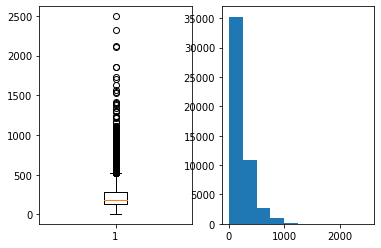

In [8]:
# Summarize review length
print("Review length: ")
result = list(map(len, X))
print("Mean %.2f words (%.3f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

In [9]:
print(numpy.max(result))

2494


In [10]:
print(numpy.min(result))

7


# Multilayer perceptron model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [12]:
# fixing random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [13]:
# Load data
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

/home/akilesh/virtualenvs/deep-learning/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/akilesh/virtualenvs/deep-learning/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [14]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [15]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


In [17]:
# total ==> 4,160,501
# 160000 ==> 5000(top_words_count) * 32 (32D) (same as dense, but there is no bias for each neuron)
# 4000250 ==> 16000(input to each neuron) + 1(bias) * 250(neurons) ==> 16001*250
# 251 ==> 250(input to neuron) + 1(bias) * 1(neuron) ==> 251*1

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 5s - loss: 0.5173 - accuracy: 0.7084 - val_loss: 0.3100 - val_accuracy: 0.8675
Epoch 2/2
196/196 - 5s - loss: 0.1964 - accuracy: 0.9246 - val_loss: 0.2976 - val_accuracy: 0.8790


In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.90%


#  One-Dimensional Convolutional Neural Network 

In [20]:
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D

In [47]:
# creating model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 16000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 251       
Total params: 4,163,605
Trainable params: 4,163,605
Non-trainable params: 0
___________________________________________

In [40]:
# 150000 ==> 5000(top_words_count) * 30 (32D) (same as dense, but there is no bias for each neuron)
# 2912 ==> 32*3 + 1 (activation) * 32 (filters)
# 4000250 ==> 16000(input) + 1(bias) * 250 = 16001*250
# 251 ==> 250(input) + 1(bias)

In [49]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 9s - loss: 0.4264 - accuracy: 0.7775 - val_loss: 0.2746 - val_accuracy: 0.8858
Epoch 2/2
196/196 - 9s - loss: 0.2029 - accuracy: 0.9216 - val_loss: 0.2686 - val_accuracy: 0.8892


In [50]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.92%
